1. Análisis exploratorio de datos
Primeras filas del dataset:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123     

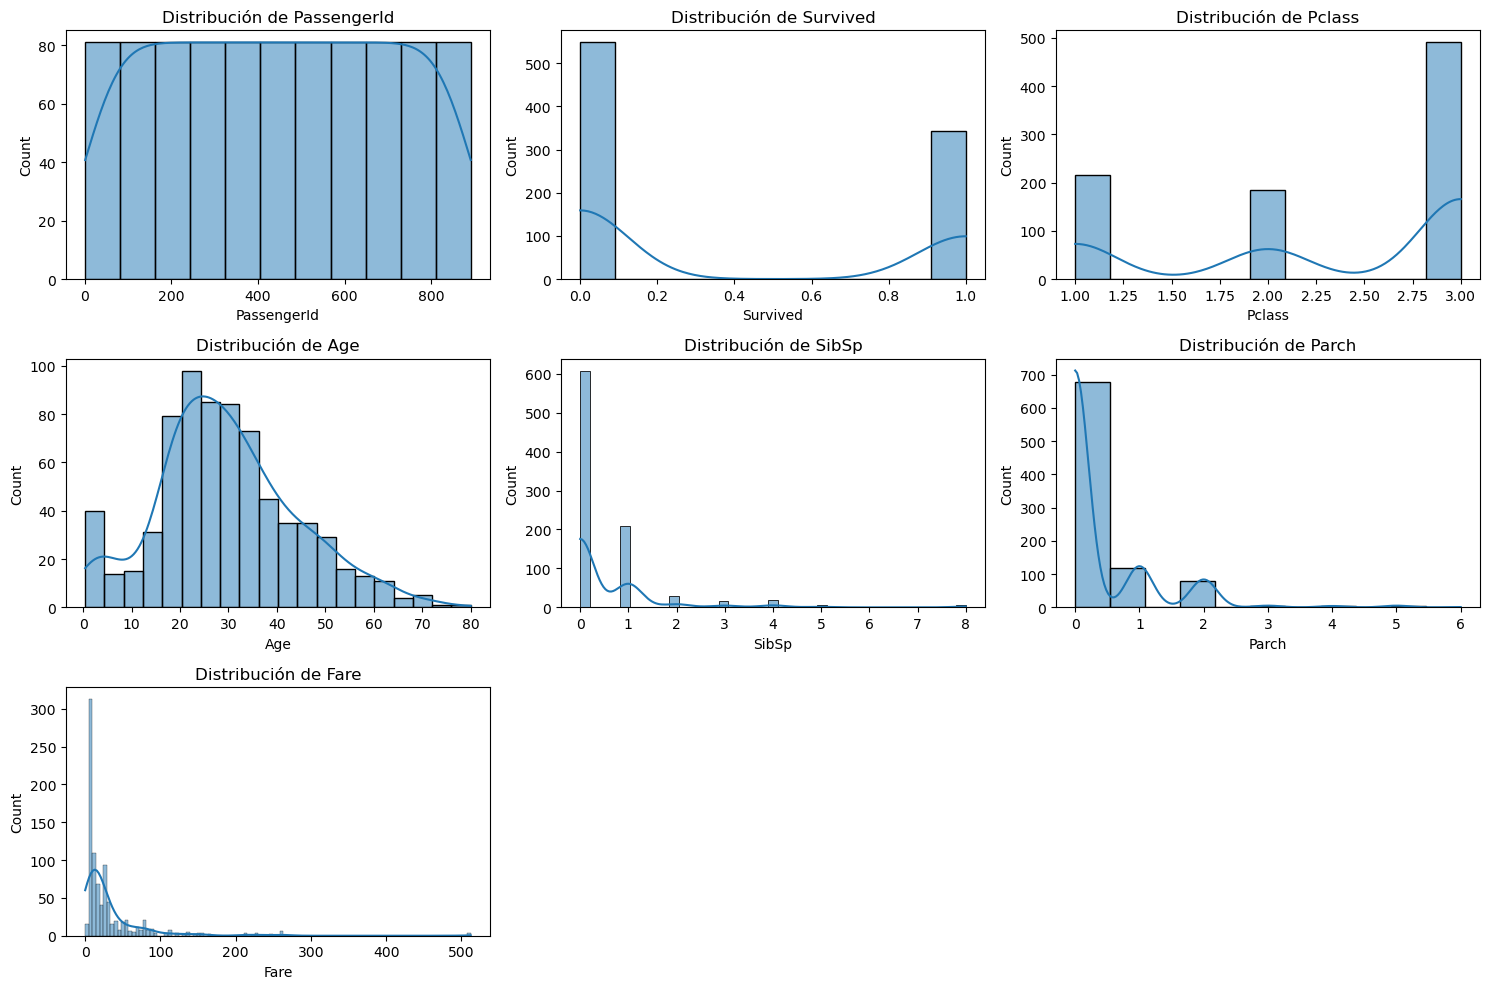

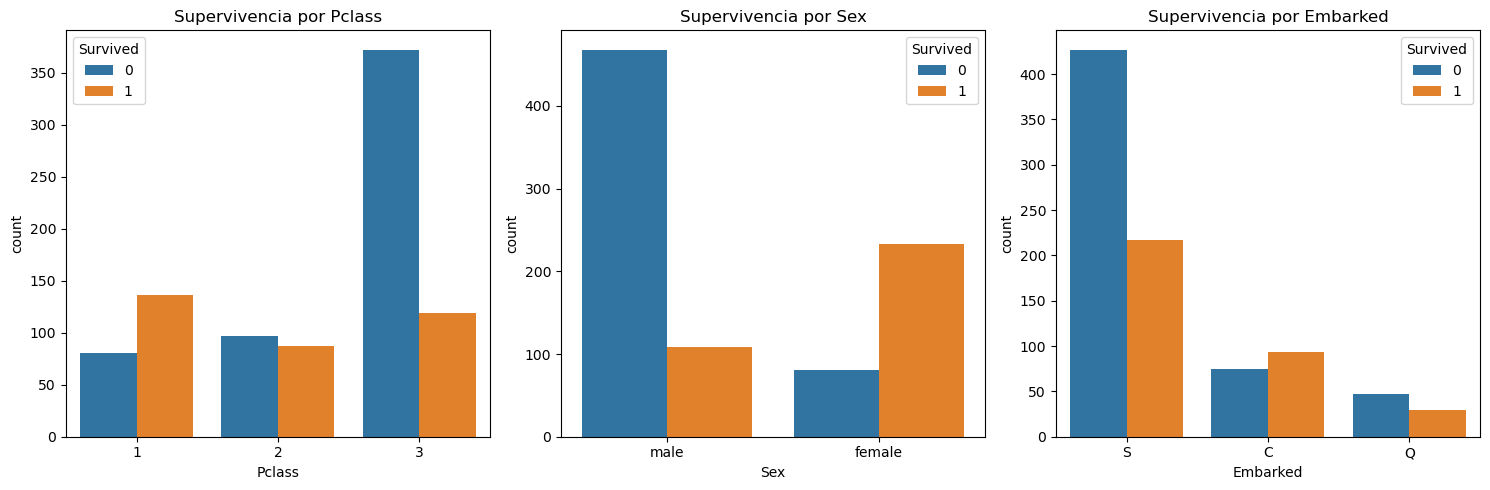

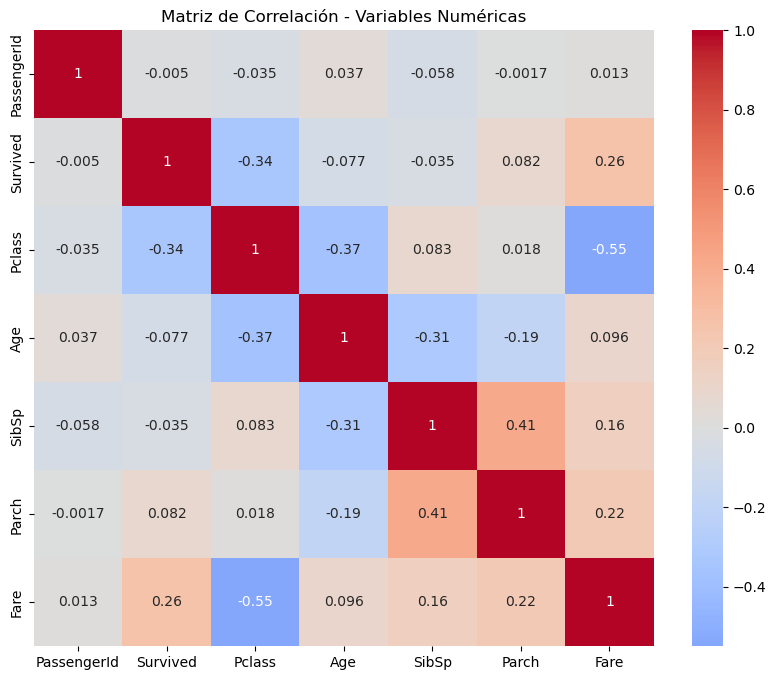


2. Preprocesamiento de datos

3. Selección de características
Características seleccionadas: ['Pclass', 'Sex', 'Fare', 'Embarked_C', 'Embarked_S']

4. División del dataset

5. Entrenamiento del modelo

6. Evaluación del modelo

Informe de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       105
           1       0.70      0.77      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.77      0.77      0.77       179



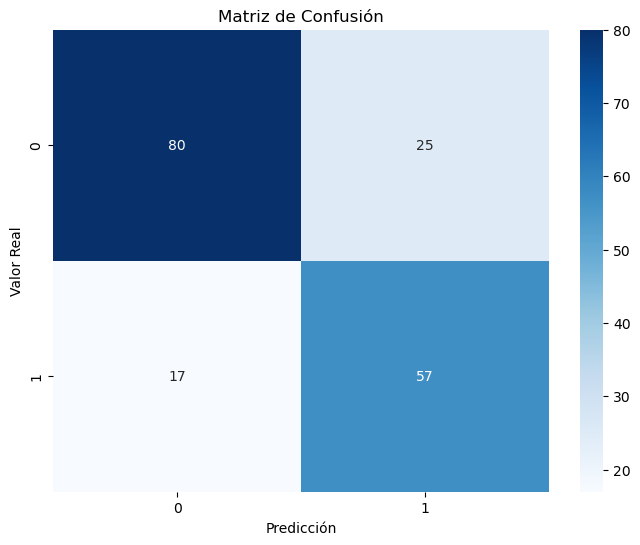

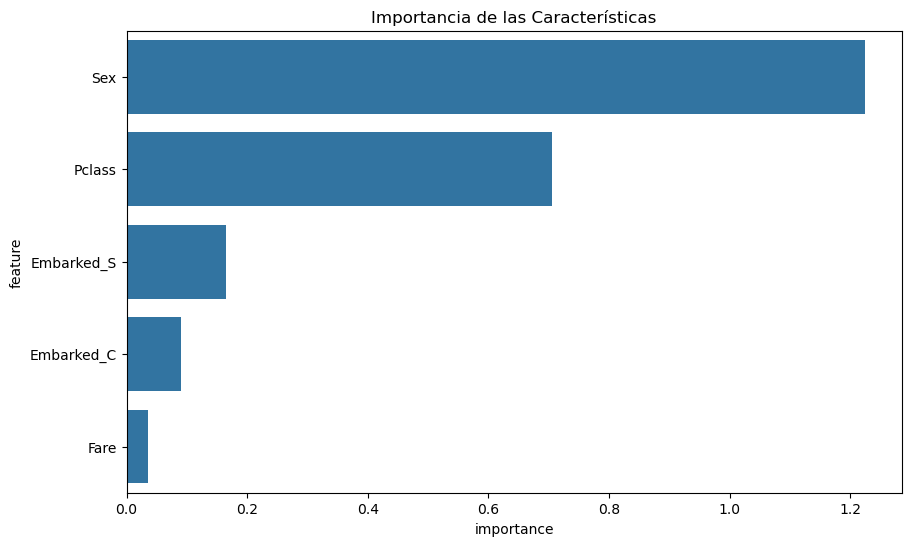

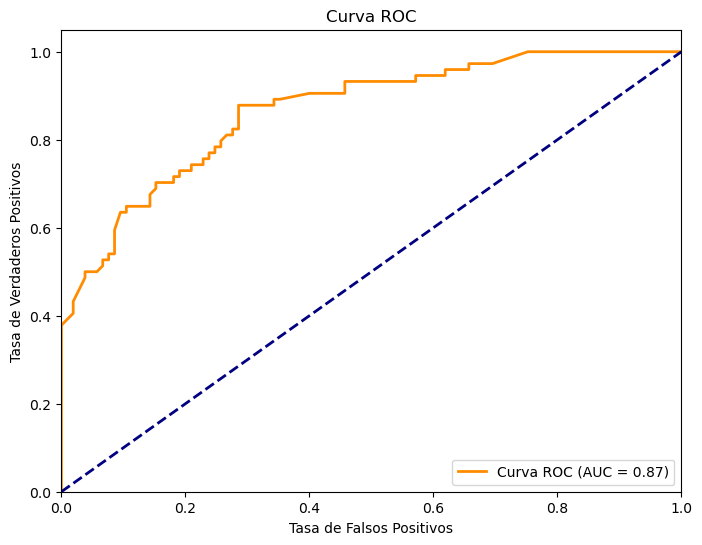


8. Interpretación, análisis y documentación de resultados
a) Resumen del modelo:
   - Precisión del modelo en el conjunto de prueba: 0.765

b) Características más importantes:
      feature  importance
1         Sex    1.223513
0      Pclass    0.704526
4  Embarked_S    0.164680
3  Embarked_C    0.090282
2        Fare    0.035335

c) Interpretación detallada de los resultados:
   1. Desempeño del modelo:
      - La precisión del modelo es 0.765, lo que significa que predice correctamente la supervivencia en aproximadamente el 76.5% de los casos.
      - Según el informe de clasificación, el modelo tiene un buen equilibrio entre precisión y exhaustividad para ambas clases (sobrevivientes y no sobrevivientes).

   2. Importancia de las características:
      - Sex: Esta característica tiene una importancia de 1.2235 en la predicción de supervivencia.
      - Pclass: Esta característica tiene una importancia de 0.7045 en la predicción de supervivencia.
      - Embarked_S: Esta caracterís

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif

# 1. Análisis exploratorio de datos
print("1. Análisis exploratorio de datos")

# Cargando los datos
url = "Titanic-Dataset.csv"
df = pd.read_csv(url)

# Mostrando las primeras filas y la información del DataFrame
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación del dataset:")
print(df.info())

# Estadísticas descriptivas solo para columnas numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
print("\nEstadísticas descriptivas de variables numéricas:")
print(df[numeric_columns].describe())

# Verificando valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Visualización de la distribución de variables numéricas
plt.figure(figsize=(15, 10))
num_numeric_columns = len(numeric_columns)
rows = (num_numeric_columns + 2) // 3  # Ceiling division to ensure we have enough rows
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(data=df, x=column, kde=True)
    plt.title(f'Distribución de {column}')
plt.tight_layout()
plt.show()

# Visualización de la relación entre variables categóricas y la supervivencia
categorical_columns = ['Pclass', 'Sex', 'Embarked']
plt.figure(figsize=(15, 5))
for i, column in enumerate(categorical_columns):
    plt.subplot(1, 3, i+1)
    sns.countplot(data=df, x=column, hue='Survived')
    plt.title(f'Supervivencia por {column}')
plt.tight_layout()
plt.show()

# Matriz de correlación solo para variables numéricas
correlation_matrix = df[numeric_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlación - Variables Numéricas')
plt.show()

# 2. Preprocesamiento de datos
print("\n2. Preprocesamiento de datos")

# Eliminando columnas que no serán utilizadas
df_processed = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

# Codificando variables categóricas
df_processed['Sex'] = df_processed['Sex'].map({'male': 0, 'female': 1})
embarked_dummies = pd.get_dummies(df_processed['Embarked'], prefix='Embarked')
df_processed = pd.concat([df_processed.drop('Embarked', axis=1), embarked_dummies], axis=1)

# Tratando valores faltantes
numeric_features = ['Age', 'Fare']
imputer = SimpleImputer(strategy='median')
df_processed[numeric_features] = imputer.fit_transform(df_processed[numeric_features])

# 3. Selección de características
print("\n3. Selección de características")
X = df_processed.drop('Survived', axis=1)
y = df_processed['Survived']

# Seleccionando las características más relevantes
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()].tolist()
print("Características seleccionadas:", selected_features)

# Usando solo las características seleccionadas
X = X[selected_features]

# 4. División del dataset
print("\n4. División del dataset")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Entrenamiento del modelo
print("\n5. Entrenamiento del modelo")
model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)

# 6. Evaluación del modelo
print("\n6. Evaluación del modelo")
y_pred = model.predict(X_test_scaled)
print("\nInforme de clasificación:")
print(classification_report(y_test, y_pred))

# 7. Visualización de resultados
# Matriz de confusión
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.show()

# Importancia de las características
feature_importance = pd.DataFrame({
    'feature': selected_features,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature')
plt.title('Importancia de las Características')
plt.show()

# Curva ROC
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

# 8. Interpretación, análisis y documentación de resultados
print("\n8. Interpretación, análisis y documentación de resultados")

print("a) Resumen del modelo:")
print(f"   - Precisión del modelo en el conjunto de prueba: {model.score(X_test_scaled, y_test):.3f}")

print("\nb) Características más importantes:")
print(feature_importance)

print("\nc) Interpretación detallada de los resultados:")
print("   1. Desempeño del modelo:")
print(f"      - La precisión del modelo es {model.score(X_test_scaled, y_test):.3f}, lo que significa que predice correctamente la supervivencia en aproximadamente el {model.score(X_test_scaled, y_test)*100:.1f}% de los casos.")
print("      - Según el informe de clasificación, el modelo tiene un buen equilibrio entre precisión y exhaustividad para ambas clases (sobrevivientes y no sobrevivientes).")

print("\n   2. Importancia de las características:")
for index, row in feature_importance.iterrows():
    print(f"      - {row['feature']}: Esta característica tiene una importancia de {row['importance']:.4f} en la predicción de supervivencia.")

print("\n   3. Matriz de confusión:")
print("      - La matriz de confusión muestra la distribución de predicciones correctas e incorrectas.")
print(f"      - Verdaderos Negativos (TN): {cm[0,0]}")
print(f"      - Falsos Positivos (FP): {cm[0,1]}")
print(f"      - Falsos Negativos (FN): {cm[1,0]}")
print(f"      - Verdaderos Positivos (TP): {cm[1,1]}")

print("\n   4. Curva ROC:")
print(f"      - El área bajo la curva ROC (AUC) es {roc_auc:.2f}, lo que indica un buen poder discriminativo del modelo.")
print("      - Un AUC de 0.5 representaría un modelo aleatorio, mientras que 1.0 sería un modelo perfecto.")

print("\nd) Limitaciones del modelo:")
print("   1. Asume una relación lineal entre las características y el logaritmo de las probabilidades de supervivencia.")
print("   2. No captura interacciones complejas entre las variables.")
print("   3. La precisión del modelo podría estar limitada por la cantidad y calidad de los datos disponibles.")
print("   4. Algunas variables importantes podrían haber sido excluidas en el proceso de selección de características.")

print("\ne) Posibles mejoras:")
print("   1. Probar algoritmos más complejos como Random Forest o Gradient Boosting para capturar relaciones no lineales.")
print("   2. Realizar una búsqueda exhaustiva de hiperparámetros para optimizar el rendimiento del modelo.")
print("   3. Crear nuevas características o realizar ingeniería de características más avanzada.")
print("   4. Recopilar más datos si es posible, especialmente para las categorías subrepresentadas.")
print("   5. Utilizar técnicas de validación cruzada para obtener una estimación más robusta del rendimiento del modelo.")

print("\nf) Conclusiones:")
print("   1. El modelo logra una precisión razonable en la predicción de supervivencia de los pasajeros del Titanic.")
print(f"   2. Las características más importantes para la predicción son {', '.join(feature_importance['feature'].head(3).tolist())}.")
print("   3. Hay margen de mejora en el modelo, especialmente en términos de capturar relaciones más complejas entre las variables.")
print("   4. Este modelo proporciona una base sólida para entender los factores que influyeron en la supervivencia en el Titanic, pero debe ser interpretado con cautela debido a sus limitaciones.")